In [1]:
import pandas as pd
import numpy as np

# Goals

## Bagging vs. Boosting

### Bagging

Bagging = Boostrap Averaging

- Boostrap:

    - Suppose we have 1000 data points → $D = 1000$
    - We get 15 datasets, each has 700 randomly chosen data points from our pool of 1000 data points → $B = 15, n = 700$
    - Learning algorithm gives B decision functions: $\hat{f_1}(x)$, $\hat{f_2}(x)$, ..., $\hat{f_B}(x).$

- Averaging:
    - We fix some particular $x_0$
    - Then we have: $\hat{f_{avg}}(x_0)$ = $\frac{1}{B} \sum_{b=1}^{B} \hat{f_{b}}(x_0).$


## Boosting

Improving weak learners by building weak learn sequentially (i.e., the next weak learning is built upon the previous weak learner with some improvement)

- Boosting Steps: 
    - A weak learner: a classifier that does better than random
    - Combine a set of weak learner to form a single classifier that makes accurate predictions 


More info: https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

### Boosting - Adaboost


- Binary classification: $Y = \{-1, 1\}$
- Training set: $D = \{ \{x_1, y_1\}, \{x_2, y_2\}, ..., \{x_n, y_n\}\}$
- Weights: $W = \{ w_1, w_2, w_3, ..., w_n \}$
- At the begining $m = 1$, $w_1 = w_2 =... w_n = \frac{1}{n}$

- For each round $m = 1,...,M$, we have a base learner $G_m(x)$

    - Calculate error: 
$err_m = \frac{\sum_{i=1}^{n} (w_i * terror_i)}{\sum_{i=1}^{n} (w_i)} = \frac{A}{B}, $

        where:
$$
\begin{eqnarray*}
&& A = \sum_{i=1}^{n} (w_i * terror_i)
\\
&& B = \sum_{i=1}^{n} (w_i)
\\
&& terror_i = 1 * ( y_i \# G_m(x_i) )
\end{eqnarray*}
$$

    - Calculate rate of the learner:
$\alpha_m = ln \big(\frac{1 - err_m}{err_m}\big)$ 

    - Update weight $w_i,$ for $i = 1,2,...,n$:  The idea is to give more weights to the wrongly classified data
$$w_i = w_i * e^{\alpha_m} = w_i * \frac{1 - err_m}{err_m}$$


- After M rounds, we have 
    - $M$ classifiers: $G_1(x), G_1(x), ..., G_M(x)$
    - $M$ rates of the learners: $\alpha_1, \alpha_2, ..., \alpha_M$
    
- Final classifier: $G(x) = sign[\sum_{m=1}^{M} (\alpha_m * G_m(x))] $

### Boosting - Gradient Boosting

Three elements:
  - Loss Function: 
      - This depends on the problem we are solving. For example, regression problems often use MSE loss, while classification may use log loss.
      - This loss function must be differentiable
        
  - Weak Learner:
      - Each decision tree is a weak learner
      - Trees are built in a greedy maner (each time, we go through every possible spliting point, and find the best spliting points, depending on the performance metric we use such as Information Gain)
   
  - Additive Model:
      - A new tree is added in each round
      - A gradient descent procedure is used to minimize the loss when adding a new tree
      - The output of the newly added tree is added to the output of the existing sequene of tree previously built

## Practice

Using sklearn's Gradient Boosting & Adaboost for classification

In [2]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from numpy import arange

In [3]:
X, y = make_classification(n_samples=1000, 
                           n_features=20,
                            n_informative=10, 
                           n_redundant=0,
                            random_state=19, 
                           shuffle=False)

In [7]:
#y

In [4]:
def evaluate_model(model, X, y):
    '''
    Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
    '''
    scores = cross_val_score(model, 
                             X, y, 
                             scoring='accuracy', 
                             n_jobs=-1)
    return scores

#### Adaboost - Number of Trees

In [8]:
results = []
model_names = []
for num_trees in [5, 10, 15, 50, 100]:
    model = AdaBoostClassifier(n_estimators=num_trees)
    scores = evaluate_model(model, X, y)
    results.append(scores)
    model_names.append('{}'.format(num_trees))

In [9]:
results

[array([0.785, 0.765, 0.825, 0.735, 0.69 ]),
 array([0.8  , 0.82 , 0.86 , 0.85 , 0.805]),
 array([0.815, 0.84 , 0.87 , 0.91 , 0.895]),
 array([0.86, 0.89, 0.9 , 0.91, 0.88]),
 array([0.87 , 0.89 , 0.905, 0.92 , 0.9  ])]

In [10]:
model_names

['5', '10', '15', '50', '100']

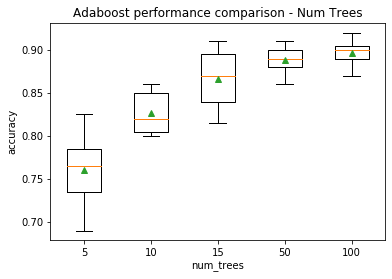

In [11]:
plt.boxplot(results, labels=model_names, showmeans=True)
plt.title('Adaboost performance comparison - Num Trees')
plt.xlabel('num_trees')
plt.ylabel('accuracy')
plt.show()

#### Adaboost - Learning Rate

In [12]:
results = []
model_names = []
for lr in [0.0001, 0.001, 0.01, 0.1, 1.0]:
    model = AdaBoostClassifier(n_estimators=10,
                              learning_rate=lr)
    scores = evaluate_model(model, X, y)
    results.append(scores)
    model_names.append('{}'.format(lr))

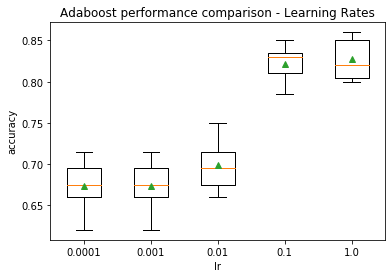

In [13]:
plt.boxplot(results, labels=model_names, showmeans=True)
plt.title('Adaboost performance comparison - Learning Rates')
plt.xlabel('lr')
plt.ylabel('accuracy')
plt.show()

In [14]:
results = []
model_names = []
for subsample in arange(0.1, 1, 0.1):
    model = GradientBoostingClassifier(subsample=subsample)
    scores = evaluate_model(model, X, y)
    results.append(scores)
    model_names.append('{}'.format(round(subsample, 2)))

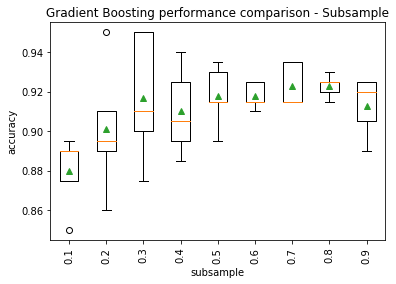

In [15]:
plt.boxplot(results, labels=model_names, showmeans=True)
plt.title('Gradient Boosting performance comparison - Subsample')
plt.xlabel('subsample')
plt.ylabel('accuracy')
plt.xticks(rotation=90)
plt.show()

## Overfitting in Tree Methods

- Happens when model's performance is high in training while low in validation --> Poor generalization of the model


## Dealing with overfitting
- Tree Shrinkage:
    - Lower number of trees
    - Lower depth
    - Decrease number of samples for each tree to fit
    